GALTON'S DATASET - PARENT AND CHILD HEIGHTS - GENETIC VARIATION



In [2]:
knitr::opts_chunk$set(
  warning = TRUE, # show warnings
  message = TRUE, # show messages
  error = TRUE, # do not interrupt generation in case of errors,
  echo = TRUE  # show R code
)


A comparison between the heights of adult children against the heights of both parents; in an attempt to infer any apparent relationship between the two.
The comparison also focuses on which parent gene is stronger, or generally has more influence on the child's height,
and ideally where each gender of the child inherits more from.
The heritability of traits, in this case height, from parent to child, is tested with 898 observations, mostly with regards to the gender of each parent and each child

Loading the needed packages


In [3]:
library(dplyr)
library(ggplot2)
library(datarium)
library(plotly)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


ERROR: Error in library(datarium): there is no package called 'datarium'


The test data



In [22]:

Galton <- read.csv("Downloads/Galtons Height Data.csv")


Observations, details, variables and checking for any missing entries on our test data



In [5]:
str(Galton)



'data.frame':	898 obs. of  6 variables:
 $ Family: int  1 1 1 1 2 2 2 2 3 3 ...
 $ Father: num  78.5 78.5 78.5 78.5 75.5 75.5 75.5 75.5 75 75 ...
 $ Mother: num  67 67 67 67 66.5 66.5 66.5 66.5 64 64 ...
 $ Gender: Factor w/ 2 levels "F","M": 2 1 1 1 2 2 1 1 2 1 ...
 $ Height: num  73.2 69.2 69 69 73.5 72.5 65.5 65.5 71 68 ...
 $ Kids  : int  4 4 4 4 4 4 4 4 2 2 ...


In [6]:
colSums(is.na(Galton))



Family Father Mother Gender Height   Kids 
     0      0      0      0      0      0

In [7]:
Galton$avg_parents=""

avg_h <- (Galton[,2] + Galton[,3])/2

Galton$avg_parents <- avg_h


Galton <- Galton[,c(1,2,3,7,4,5,6)]




Data visualization



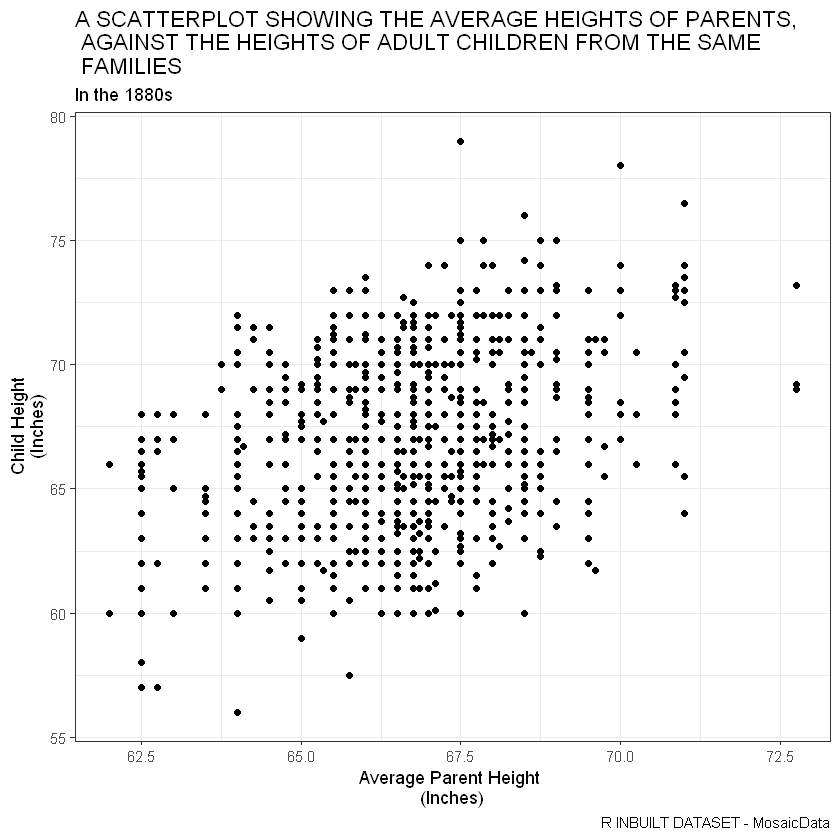

In [8]:
ggplot(Galton, aes(x=avg_parents, y=Height))+
  geom_point()+
  labs(title = "A SCATTERPLOT SHOWING THE AVERAGE HEIGHTS OF PARENTS,\n AGAINST THE HEIGHTS OF ADULT CHILDREN FROM THE SAME \n FAMILIES", subtitle = "In the 1880s", x="Average Parent Height \n(Inches)", y="Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
  theme_bw()


As per the plot above, a positive relationship is visualized between the heights of the parents and the heights of the children. Taller parents generally have taller children, and the vice versa stands.

However, for parents with similar average height, the variation between the child heights observed is quite large.


In [9]:
Galton %>% 
   filter(avg_parents==67.5) %>% 
    summarise(max=max(Height), min=min(Height))


max,min
79,60


For example, the above average parent height, of 67.5 inches, has a comparatively large range in the case of the child heights; where the tallest is at a height of 79 inches, and the shortest is at 60 inches.

This huge variation indicates that several other factors, excluding the height of both parents strongly determine the height of the child

The other case could be that the children have parents with heights that vary greatly, and the child inherits strongly from one parental side than the other

Breaking it down to gender, however, clearly explains part of this huge variation in child heights, as below.


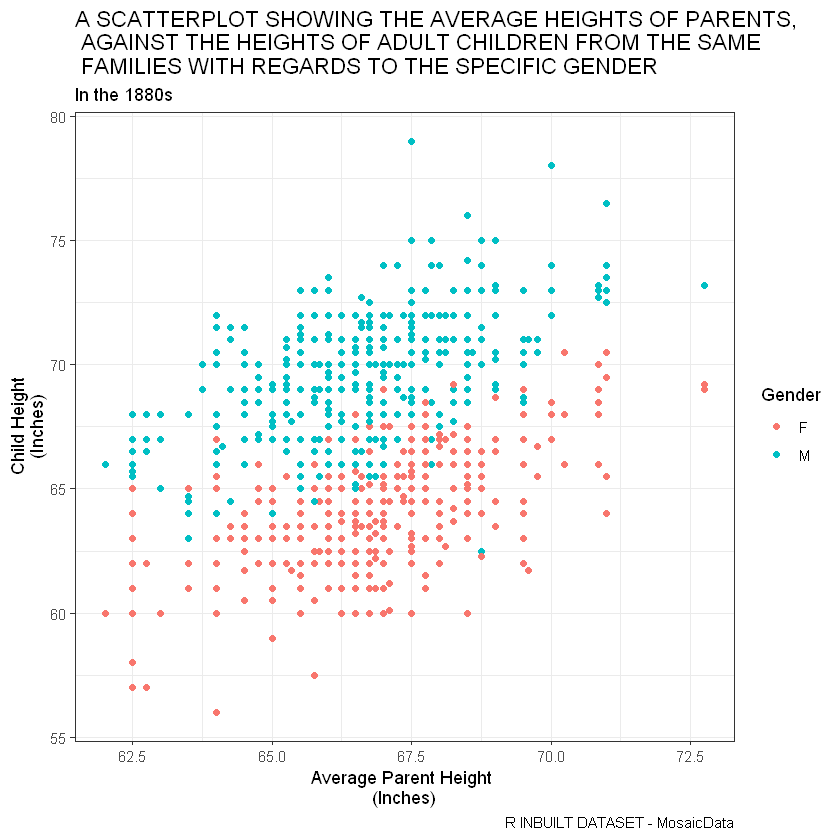

In [10]:
ggplot(Galton, aes(x=avg_parents, y=Height))+
  geom_point(aes(color=Gender))+
  labs(title = "A SCATTERPLOT SHOWING THE AVERAGE HEIGHTS OF PARENTS,\n AGAINST THE HEIGHTS OF ADULT CHILDREN FROM THE SAME \n FAMILIES WITH REGARDS TO THE SPECIFIC GENDER", subtitle = "In the 1880s", x="Average Parent Height \n(Inches)", y="Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
  theme_bw()


As seen, a very large influence of the child's height is determined by the gender.
Male children, as seen above, have higher heights than female children, and this causes the heights of children to vary greatly, despite being from the same family with the same parents


In [11]:
Galton %>% 
  group_by(Gender) %>% 
   summarise(Average_Height=mean(Height), Median_Height=median(Height))


Gender,Average_Height,Median_Height
F,64.11016,64.0
M,69.22882,69.2


The height summary above shows the same. Male children tend to have a higher height level than female children

On separate plots


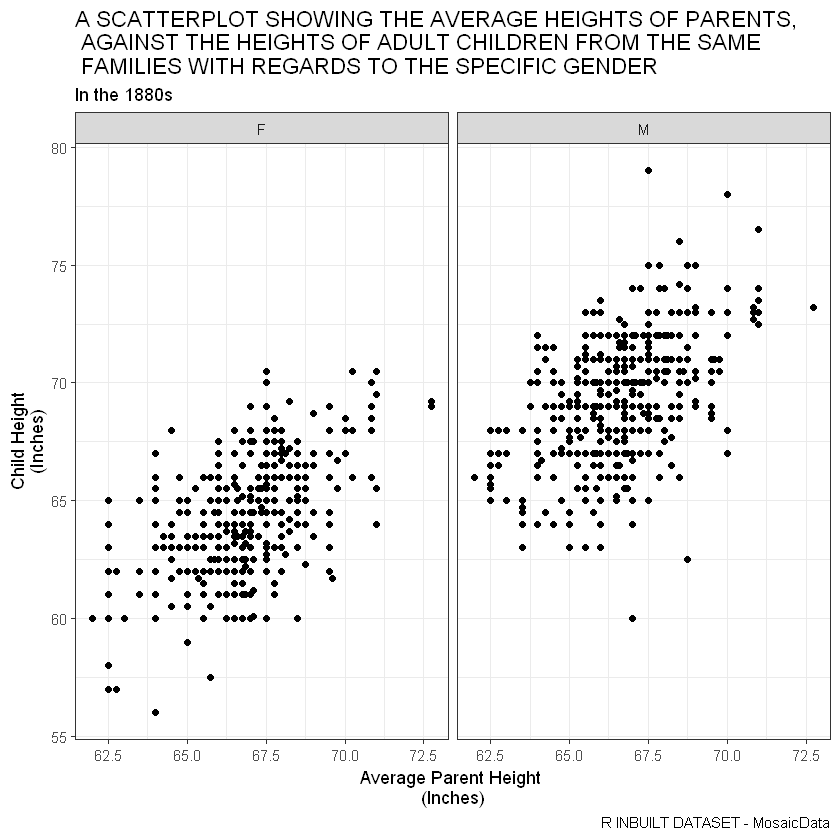

In [12]:
ggplot(Galton, aes(x=avg_parents, y=Height))+
  geom_point()+
  facet_wrap(~Gender)+
  labs(title = "A SCATTERPLOT SHOWING THE AVERAGE HEIGHTS OF PARENTS,\n AGAINST THE HEIGHTS OF ADULT CHILDREN FROM THE SAME \n FAMILIES WITH REGARDS TO THE SPECIFIC GENDER", subtitle = "In the 1880s", x="Average Parent Height \n(Inches)", y="Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
  theme_bw()


Observing the plots, we expect a positive correlation between the child height and the average parents height, and because of the high variation in child heights for similar average parent heights, the correlation is anticipated to be a weak one



In [13]:
cor(Galton$avg_parents, Galton$Height)



[1] 0.3270739

The value is less than the 0.5 mark, hence is classified as a weak correlation.

A linear model thus, would have a low score, if it were to be used to predict various child heights, with regards to the average height of both parents


In [23]:
Galton_parents_lm <- lm(Height~avg_parents, data = Galton) 

summary(Galton_parents_lm)


ERROR: Error in eval(predvars, data, env): object 'avg_parents' not found


Similar to..



In [24]:
Galton_lm <- lm(Height~Mother+Father, data= Galton)

summary(Galton_lm)



Call:
lm(formula = Height ~ Mother + Father, data = Galton)

Residuals:
   Min     1Q Median     3Q    Max 
-9.136 -2.700 -0.181  2.768 11.689 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 22.30971    4.30690   5.180 2.74e-07 ***
Mother       0.28321    0.04914   5.764 1.13e-08 ***
Father       0.37990    0.04589   8.278 4.52e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.386 on 895 degrees of freedom
Multiple R-squared:  0.1089,	Adjusted R-squared:  0.1069 
F-statistic: 54.69 on 2 and 895 DF,  p-value: < 2.2e-16


Multiple R squared values of 0.1 are very low. The regression models above would be ineffective if they were to be used to try and achieve accurate predictive child height results, from just the heights of both parents

As mentioned, genes are not the sole predictor of child heights. Lots of other variants, known and unknown come into play





Trying to establish which parent has more influence on the child heights

Studies and research show that the father's gene is stronger, and children tend to inherit more from the side of the father than the mother


2. Father's height on the height both child genders vs Mother's height on both child genders

Creating the needed dataset, with the needed columns


In [27]:
str(Galton)

Galton_father <- Galton[,-c(3,7)]




'data.frame':	898 obs. of  6 variables:
 $ Family: int  1 1 1 1 2 2 2 2 3 3 ...
 $ Father: num  78.5 78.5 78.5 78.5 75.5 75.5 75.5 75.5 75 75 ...
 $ Mother: num  67 67 67 67 66.5 66.5 66.5 66.5 64 64 ...
 $ Gender: Factor w/ 2 levels "F","M": 2 1 1 1 2 2 1 1 2 1 ...
 $ Height: num  73.2 69.2 69 69 73.5 72.5 65.5 65.5 71 68 ...
 $ Kids  : int  4 4 4 4 4 4 4 4 2 2 ...


Visualization



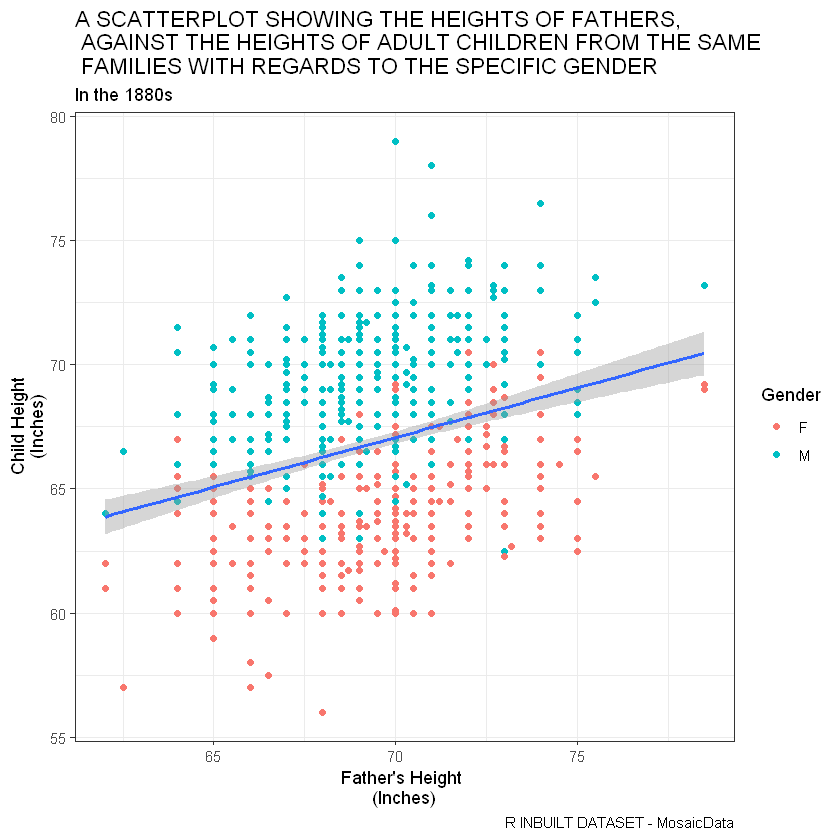

In [28]:
ggplot(Galton_father, aes(x=Father, y=Height))+
  geom_point(aes(color=Gender))+
   labs(title = "A SCATTERPLOT SHOWING THE HEIGHTS OF FATHERS,\n AGAINST THE HEIGHTS OF ADULT CHILDREN FROM THE SAME \n FAMILIES WITH REGARDS TO THE SPECIFIC GENDER", subtitle = "In the 1880s", x="Father's Height \n(Inches)", y="Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
   geom_smooth(method="lm")+
  theme_bw()


On the mother's side..



In [29]:
Galton_mother <- Galton[,-c(2,7)]




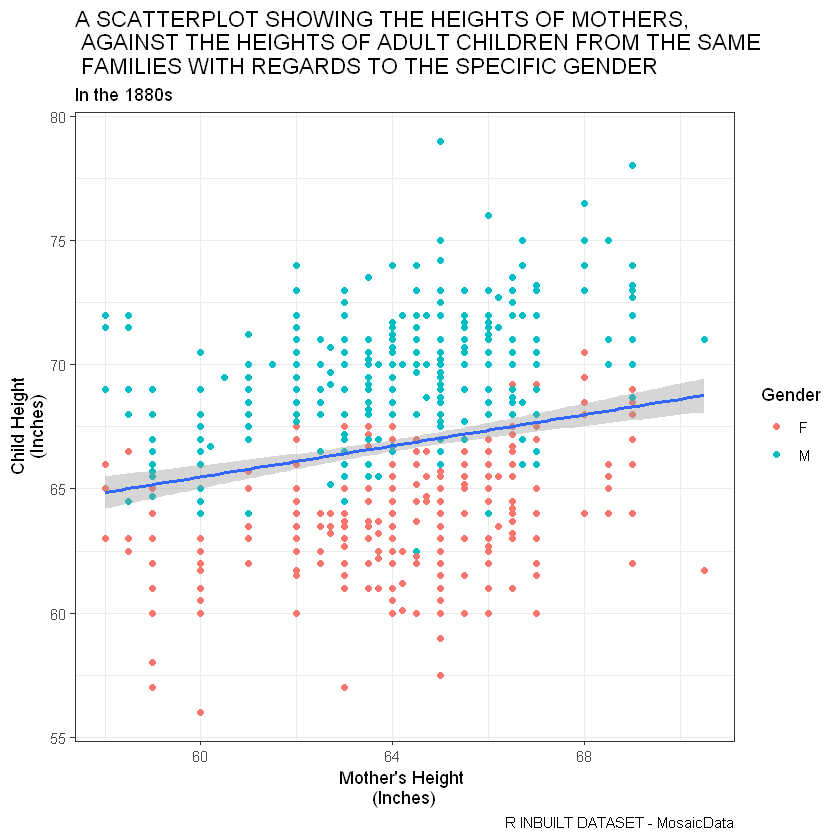

In [30]:
ggplot(Galton_mother, aes(x=Mother, y=Height))+
  geom_point(aes(color=Gender))+
    labs(title = "A SCATTERPLOT SHOWING THE HEIGHTS OF MOTHERS,\n AGAINST THE HEIGHTS OF ADULT CHILDREN FROM THE SAME \n FAMILIES WITH REGARDS TO THE SPECIFIC GENDER", subtitle = "In the 1880s", x="Mother's Height \n(Inches)", y="Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
  geom_smooth(method="lm")+
  theme_bw()


An apparent difference in correlation is hard to visualize from the plots, however its is clear that an increase in height, for the father, results in a greater increase in child height than for the mother
Especially for the female child, which, as observed from the mother's plot seems to be relatively similar across the different mother's heights.

Looking at the correlation values..

The father's


In [33]:
cor(Galton_father$Father, Galton_father$Height)



[1] 0.2753548


The mother's


In [35]:
cor(Galton_mother$Mother, Galton_mother$Height)



[1] 0.2016549

The father's height has a better, but still weak relationship, with the child height, compared to the mother's height.



In [41]:
Galton_father_lm <- lm(eight~Father, data= Galton_father)

summary(Galton_father_lm)



Call:
lm(formula = Height ~ Father, data = Galton_father)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2683  -2.6689  -0.2092   2.6342  11.9329 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.11039    3.22706  12.120   <2e-16 ***
Father       0.39938    0.04658   8.574   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.446 on 896 degrees of freedom
Multiple R-squared:  0.07582,	Adjusted R-squared:  0.07479 
F-statistic: 73.51 on 1 and 896 DF,  p-value: < 2.2e-16


As seen from the estimate, a one unit, in this case inch, increase on the father's height, increases the child height by an additional 0.39938

The accuracy of the linear model however is still very low, and the father's height alone is not substantial enough to predict child heights.


In [39]:
Galton_mother_lm <- lm(Height~Mother, data= Galton_mother)

summary(Galton_mother_lm)



Call:
lm(formula = Height ~ Mother, data = Galton_mother)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5474 -2.6346 -0.1079  2.8688 11.9526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.69077    3.25874  14.328  < 2e-16 ***
Mother       0.31318    0.05082   6.163 1.08e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.511 on 896 degrees of freedom
Multiple R-squared:  0.04066,	Adjusted R-squared:  0.03959 
F-statistic: 37.98 on 1 and 896 DF,  p-value: 1.079e-09


From the estimate, the increase in height of the mother has less of an influence to the child's height than the father's. Here, a one inch increase in the mother's height shows an additional 0.31318 on the child's height

The predictive model of the mother(at 0.04), is less accurate than the father's(at 0.075), although both models are sufficiently incapable of providing accurate predictive results



Observing the parents' height in relation to each child gender..

3. Father's vs Mother's height influence on the male child's height

Looking at the father

Filtering the dataset to only the male children, dropping the unneeded columns


In [42]:
Galton_father_male <- Galton %>% 
                        filter(Gender=="M")

Galton_father_male <- Galton_father_male[,-c(3,7)]
  



Visualization



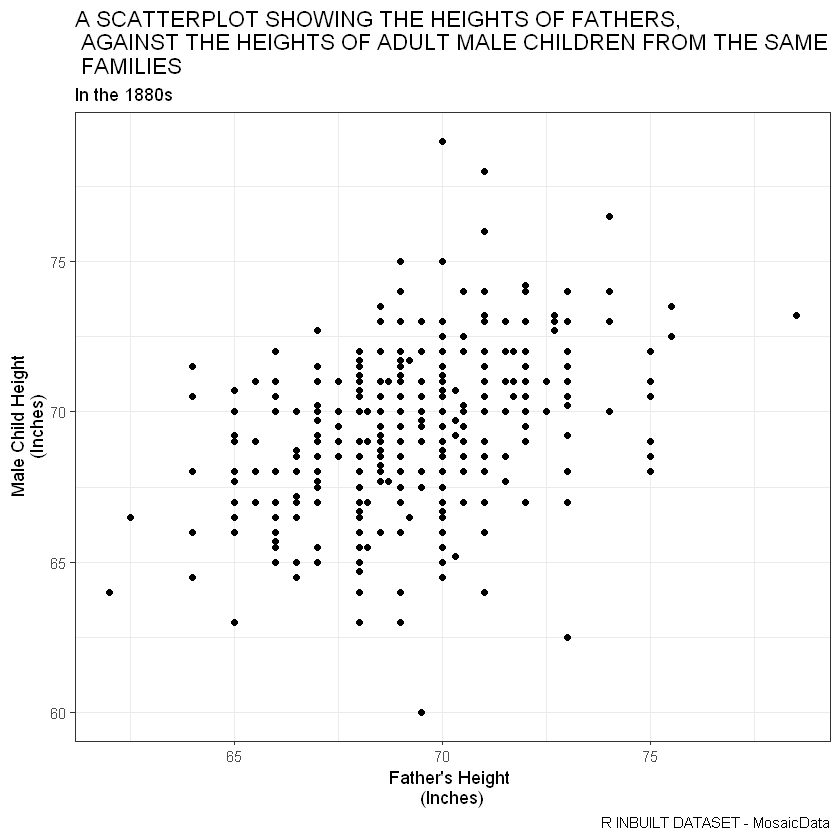

In [43]:
ggplot(Galton_father_male, aes(x=Father, y=Height))+
  geom_point()+
 labs(title = "A SCATTERPLOT SHOWING THE HEIGHTS OF FATHERS,\n AGAINST THE HEIGHTS OF ADULT MALE CHILDREN FROM THE SAME\n FAMILIES", subtitle = "In the 1880s", x="Father's Height \n(Inches)", y="Male Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
  theme_bw()


High variations in child height still exist, between father's of relatively similar heights

Outlier analysis


Observing the child with the highest height at 79..
The height of the father was at 70 inches, showing a high variation between the father's height and the child's height

A brief look at the child's mother's height - to find out if the high child height could be as a result of a high mother's height


In [44]:
Galton %>% 
  filter(Height==79.0 & Father==70.0 & Gender=="M")


Family,Father,Mother,Gender,Height,Kids
72,70,65,M,79,7


The mother's height is 5 inches lower than the father's and 14 inches lower than the child height, showing an even greater variation

Comparing the child height to the height of his other siblings


In [45]:
Galton %>% 
  filter(Family==72)


Family,Father,Mother,Gender,Height,Kids
72,70,65,M,79.0,7
72,70,65,M,75.0,7
72,70,65,M,71.0,7
72,70,65,F,69.0,7
72,70,65,F,67.0,7
72,70,65,F,65.7,7
72,70,65,F,62.0,7


The heights of the children vary greatly, mostly due to the gender, but even amongst the male children there is still a range of 8 inches between the highest and lowest

Here, the father and mother's height cannot explain the child height, and this shows that other factors other than parental genes are signifcant in determining the child height.

It could still be genetic, but possibly from generations before the parents.


Aside from the outliers, looking at the correlation between the father's height and the male child's height


In [46]:
cor(Galton_father_male$Father, Galton_father_male$Height)



[1] 0.3913174

Positive, weak.
But so far the strongest correlation to child height seen. A comparison will be made with the mother's relationship on the male child later


In [47]:
Galton_father_male_lm <- lm(Height~Father, data= Galton_father_male)

summary(Galton_father_male_lm)



Call:
lm(formula = Height ~ Father, data = Galton_father_male)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3774 -1.4968  0.0181  1.6375  9.3987 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.25891    3.38663   11.30   <2e-16 ***
Father       0.44775    0.04894    9.15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.424 on 463 degrees of freedom
Multiple R-squared:  0.1531,	Adjusted R-squared:  0.1513 
F-statistic: 83.72 on 1 and 463 DF,  p-value: < 2.2e-16


A rapid male child increase in height is observed too from the coefficients estimate, with an increase in father's height. A one inch increase on the father's height relatively accounts for a 0.44775 increase in the male child's height


Looking at the mother

Filtering the dataset, dropping unneeded columns..


In [49]:
Galton_mother_male <- Galton[,-c(2,7)]

Galton_mother_male <- Galton_mother_male %>% 
  filter(Gender=="M")



Visualization



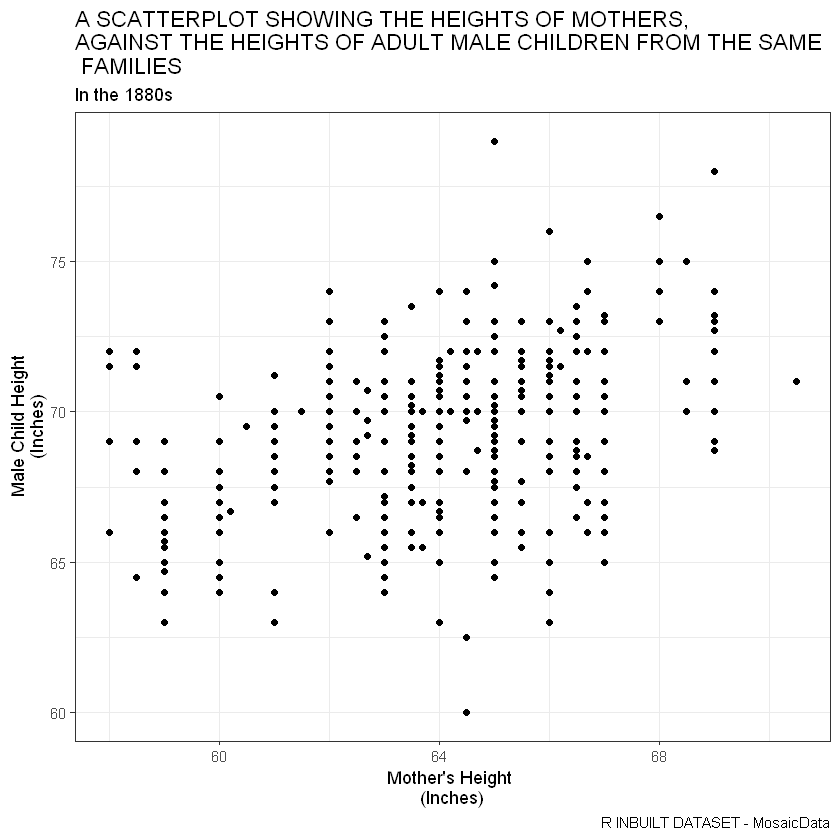

In [50]:
ggplot(Galton_mother_male, aes(x=Mother, y=Height))+
           geom_point()+
           labs(title = "A SCATTERPLOT SHOWING THE HEIGHTS OF MOTHERS,\nAGAINST THE HEIGHTS OF ADULT MALE CHILDREN FROM THE SAME \n FAMILIES ", subtitle = "In the 1880s", x="Mother's Height \n(Inches)", y="Male Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
           theme_bw()


Outlier Analysis

Looking at the plot, an outlier is observed at the lowest male child height, despite having an average height mother

Looking at the child's father's height


In [51]:
Galton %>% 
  filter(Height==60.0 & Mother==64.5 & Gender=="M")


Family,Father,Mother,Gender,Height,Kids
109,69.5,64.5,M,60,7


The father's height is at 69.5, relatively tall. A 9.5 inches difference from the male child's height. The parents' heights both cannot establish a relationship with the child height in this case.
Other factors have to be considered

Looking at the child's siblings, if any


In [52]:
Galton %>% 
  filter(Family==109)


Family,Father,Mother,Gender,Height,Kids
109,69.5,64.5,M,69.7,7
109,69.5,64.5,M,68.0,7
109,69.5,64.5,M,60.0,7
109,69.5,64.5,F,65.2,7
109,69.5,64.5,F,64.5,7
109,69.5,64.5,F,63.7,7
109,69.5,64.5,F,60.0,7


Compared to his male counterparts, the child's height is significantly lower and even lower than two of his female siblings.

Another factor had to be in play here other than genes, - illness, injury etc


Now observing the mother's correlation on the male child's height, and comparing it to the father's as seen before


In [53]:
cor(Galton_mother_male$Mother, Galton_mother_male$Height)



[1] 0.3341309

Positive, weak.

The correlation between the mother's height and the male child's is lower than that of the father's (0.391).
The trends are similar, however, the male child heights can be explained better by the father's height than the mother's, just as in the case of both male and female child heights as seen before


In [54]:
Galton_mother_male_lm <- lm(Height~Mother, data= Galton_mother_male)

summary(Galton_mother_male_lm)



Call:
lm(formula = Height ~ Mother, data = Galton_mother_male)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.4152 -1.6686  0.2081  1.7081  9.3964 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.11877    3.16281  14.265  < 2e-16 ***
Mother       0.37669    0.04938   7.628 1.37e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.483 on 463 degrees of freedom
Multiple R-squared:  0.1116,	Adjusted R-squared:  0.1097 
F-statistic: 58.19 on 1 and 463 DF,  p-value: 1.367e-13


The impact of the mother's height on the male child is also lower than that of the father's

A one inch increase in the mother's height adds 0.37669 inches to the male child, compared to the 0.4475 inches in the case of the father

This shows that the more dominant parental genes in a child, with regards to height are the father's


4. Father's vs Mother's Height on the Female child Height

Looking at the father

Filtering the dataset, dropping the unneeded columns


In [55]:
Galton_father_female <- Galton[,-c(3,7)]

Galton_father_female <- Galton_father_female %>% 
  filter(Gender=="F")



Visualization



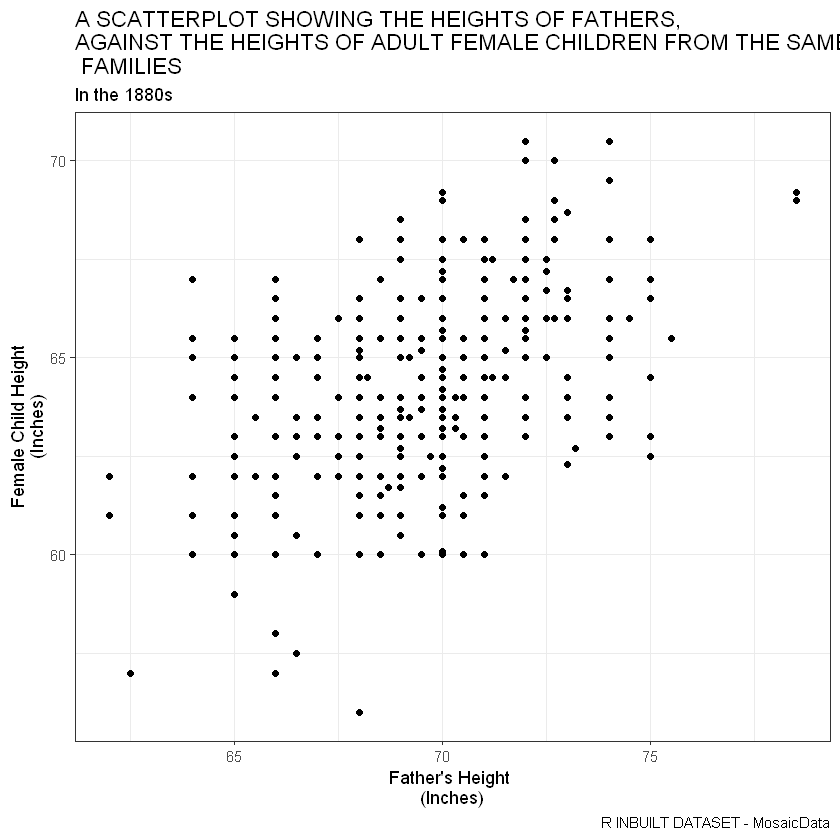

In [56]:
ggplot(Galton_father_female, aes(x=Father, y=Height))+
  geom_point()+
   labs(title = "A SCATTERPLOT SHOWING THE HEIGHTS OF FATHERS,\nAGAINST THE HEIGHTS OF ADULT FEMALE CHILDREN FROM THE SAME \n FAMILIES", subtitle = "In the 1880s", x="Father's Height \n(Inches)", y="Female Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
  theme_bw()


Outlier Analysis

Observing the female child with the lowest height

Her mother's height:


In [57]:
Galton %>% 
  filter(Height==56.0 & Father==68.0)


Family,Father,Mother,Gender,Height,Kids
155,68,60,F,56,7


The height of the child's mother is 4 inches taller. This child's height hence is not influenced by the parents' height

Comparison with siblings, if any: 


In [58]:
Galton %>% 
  filter(Family==155)


Family,Father,Mother,Gender,Height,Kids
155,68,60,M,64,7
155,68,60,F,61,7
155,68,60,F,61,7
155,68,60,F,60,7
155,68,60,F,60,7
155,68,60,F,60,7
155,68,60,F,56,7


As for this child's 5 female siblings, the trend of their heights is fairly similar, and strongly related to the heights of their parents
The child observed is thus a special case where other variants come into play to determine the height of the child

Further comparison can be made on the child's height at the same height level of the father, to the corresponding child with the highest height


In [59]:
Galton %>% 
  filter(Height==68.0 & Father==68.0 & Gender=="F")


Family,Father,Mother,Gender,Height,Kids
134,68,65,F,68,4


A rare case too on this, where the child height is equal to the father's height(at 68 inches), despite being of female sex and having a shorter mother(at 65 inches)



In [60]:
Galton %>% 
  filter(Family==134 & Father==68.0)


Family,Father,Mother,Gender,Height,Kids
134,68,65,M,72,4
134,68,65,M,72,4
134,68,65,F,68,4
134,68,65,F,66,4


Observing the correlation between the father's height and the female child's height, and later comparing it to the mother's on the same child gender



In [62]:
cor(Galton_father_female$Father, Galton_father_female$Height)



[1] 0.4587605

A weak to medium, positive correlation - the highest observed

The father's height in this case seems to have a stronger relationship with the female child's height(at a co-effiecient of 0.4587605), compared to the relationship with the male child, observed previously, (at 0.3913174)


In [63]:
Galton_father_female_lm <- lm(Height~Father, data= Galton_father_female)

summary(Galton_father_female_lm)



Call:
lm(formula = Height ~ Father, data = Galton_father_female)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5741 -1.4857 -0.0437  1.5143  5.2795 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  35.5852     2.6632   13.36   <2e-16 ***
Father        0.4116     0.0384   10.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.109 on 431 degrees of freedom
Multiple R-squared:  0.2105,	Adjusted R-squared:  0.2086 
F-statistic: 114.9 on 1 and 431 DF,  p-value: < 2.2e-16


The R squared value at 0.21 is the highest observed, however still low to generate accuracy in predictions of female child heights.

The father's height hence plays a bigger role hence in determining the height of the female child than of the male


Looking at the mother

Filtering, dropping unneeded columns..


In [64]:
Galton_mother_female <- Galton %>% 
  filter(Gender=="F")

Galton_mother_female <- Galton_mother_female[,-c(2,7)]



Visualization



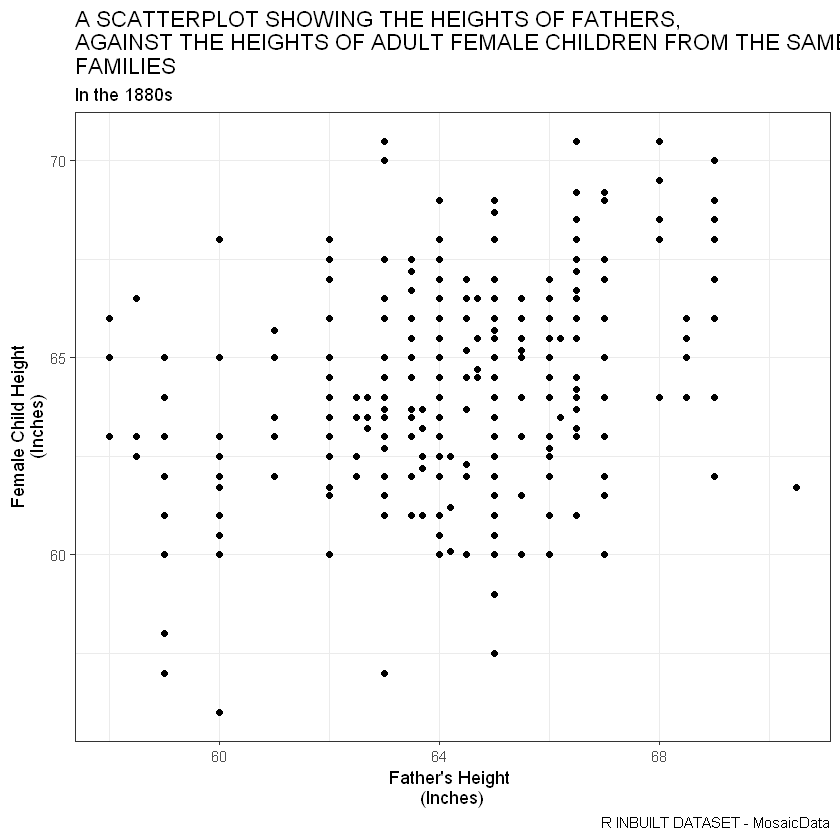

In [65]:
ggplot(Galton_mother_female, aes(x=Mother, y=Height))+
           geom_point()+
  labs(title = "A SCATTERPLOT SHOWING THE HEIGHTS OF FATHERS,\nAGAINST THE HEIGHTS OF ADULT FEMALE CHILDREN FROM THE SAME\nFAMILIES", subtitle = "In the 1880s", x="Father's Height \n(Inches)", y="Female Child Height\n(Inches)", caption = "R INBUILT DATASET - MosaicData")+
           theme_bw()


Outlier Analysis

Observing the mother with the highest height..


In [66]:
Galton %>% 
  filter(Mother==70.5, Height==61.7)


Family,Father,Mother,Gender,Height,Kids
128,68.7,70.5,F,61.7,2


Comaparison with siblings:



In [67]:
Galton %>% 
  filter(Family==128)


Family,Father,Mother,Gender,Height,Kids
128,68.7,70.5,M,71.0,2
128,68.7,70.5,F,61.7,2


The child's height is 8 inches shorter than the average parents height, and 11 whole inches shorter than her male sibling, a range that cannot only be attributed to gender alone

Again, outlier analysis shows that other variants are necessary in determining the child's height, hence regression models that only factor in the parents' heights cannot fully establish accurate predictive results on child heights

Observing the correlation of the mother's height and the female child's height, and equating it to the (as-seen high) correlation of the father's on the same child gender


In [68]:
cor(Galton_mother_female$Mother, Galton_mother_female$Height)



[1] 0.3136984

The correlation is much lower than the father's on the female child height(at 0.4587605)
It is also lower that the mother's correlation on the male child

A model thus, would be less ineffective than that of the father and the female child height alone


In [69]:
Galton_mother_female_lm <- lm(Height~Mother, data= Galton_mother_female)

summary(Galton_mother_female_lm)



Call:
lm(formula = Height ~ Mother, data = Galton_mother_female)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8814 -1.5446  0.0983  1.4452  6.7717 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 43.15546    3.05709  14.117  < 2e-16 ***
Mother       0.32655    0.04761   6.859 2.42e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.253 on 431 degrees of freedom
Multiple R-squared:  0.09841,	Adjusted R-squared:  0.09631 
F-statistic: 47.04 on 1 and 431 DF,  p-value: 2.421e-11


As per the co-efficient estimates, the father's at (0.41) compared to the mother's at (0.32) shows that an increase in the father's height has a larger increase in the female child height than that of the mother


SUMMARY

The analysis shows that:

1) The father's genetics are more dominant in determining both the male child heights and the female child heights,


2) The father's height thus becomes a better indicator of the child heights than the mother's height, however both are still significant child-height determiners on their own,


3) The father's height has a better relationship with the female child heights than the males. Male children heights have high volatility, which could be a probable cause of this


4) The whole analysis showed great variations among child heights, and some outlier analysis confirmed that the parent heights alone is not enough to fully/ accurately determine the child heights. Other external factors come into play,
and so accurate linear regression models cannot be fit without significant research on other variants on the subject matter at hand.
